In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

# 1. Dispersion relation (parallel propagation)

In [2]:
def solveDispersionFullOrbit(k, pol, wch, vA, vth, v0, nuh, Ah, Zh, AMHD, initial_guess, tol, max_it=100):
    
    
    def Z(xi):
        return np.sqrt(np.pi)*np.exp(-xi**2)*(1j - sp.erfi(xi))

    def Zprime(xi):
        return -2*(1 + xi*Z(xi))
    
    
    def D(k, w, pol):
        xi = (w - k*v0 + pol*wch)/(k*vth)
        
        return 1 - vA**2*k**2/w**2 + pol*Zh*nuh*wch/(AMHD*w) + nuh*wch**2*Zh**2/(Ah*AMHD*w**2)*(w - k*v0)/(k*vth)*Z(xi)
    
    def Dprime(k, w, pol):
        xi  = (w - k*v0 + pol*wch)/(k*vth)
        xip = 1/(k*vth)
        
        return 2*vA**2*k**2/w**3 - pol*Zh*nuh*wch/(AMHD*w**2) - 2*nuh*wch**2*Zh**2/(Ah*AMHD*w**3)*(w - k*v0)/(k*vth)*Z(xi) + nuh*wch**2*Zh**2/(Ah*AMHD*w**2)*1/(k*vth)*Z(xi) + nuh*wch**2*Zh**2/(Ah*AMHD*w**2)*(w - k*v0)/(k*vth)*Zprime(xi)*xip
    
    w = initial_guess
    counter = 0
    
    while True:
        wnew = w - D(k, w, pol)/Dprime(k, w, pol)
        
        if np.abs(wnew - w) < tol or counter == max_it:
            w = wnew
            break

        w = wnew
        counter += 1

    return w, counter

In [12]:
data = np.loadtxt('results/STRUPHY_Nel=20_p=3_L=2pidk_dt=0.04_Np=4e5_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-4_CV=on_xy.txt')

In [13]:
k          = 0.75                        # wavenumber
g_sqrt     = 2*np.pi/k                   # Jacobi determinant
nuh        = 0.05                        # ration hot/cold ion number densities
rhoeq_phys = 1.                          # bulk mass density
nh0_phys   = rhoeq_phys*nuh              # hot ion number density on physical domain
nh0        = nh0_phys*g_sqrt             # hot ion number density on logical domain 
vth        = 1.                          # thermal velocity of hot ions
v0         = 2.5                         # mean velocity of hot ions

Ah         = 1.
Zh         = 1.
AMHD       = 1.

Eh_eq = nh0/2*(v0**2 + 3*vth**2/2)


en_U   = data[:, 0]
en_B   = data[:, 1]
en_H   = data[:, 2]
tn     = data[:, 3]
en_tot = en_U + en_B + en_H + Eh_eq

w, counter = solveDispersionFullOrbit(k, +1, +1, 1., vth, v0, nuh, Ah, Zh, AMHD, 1. + 0j, 1e-10, max_it=100)

wr = np.real(w)
wi = np.imag(w)

In [14]:
en_B

array([3.50899851e-07, 3.50584192e-07, 3.49638360e-07, ...,
       3.58563732e-01, 3.58830789e-01, 3.59109042e-01])

# 2. Results
## 2. 1 x - direction (with control variate)

(0.0, 200.0)

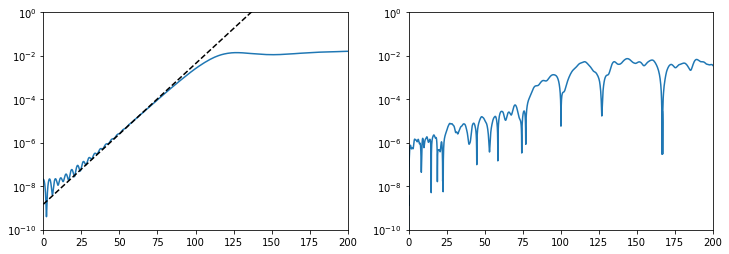

In [30]:
fig = plt.figure()
fig.set_figwidth(12)


plt.subplot(1, 2, 1)
plt.semilogy(tn, en_B)
plt.ylim((1e-10, 1e0))
plt.xlim((0., 200.))
plt.semilogy(tn, 1.5e-9*np.exp(2*tn*wi), 'k--')

plt.subplot(1, 2, 2)
plt.semilogy(tn, np.abs(en_tot[0] - en_tot)/en_tot[0])
plt.ylim((1e-10, 1e0))
plt.xlim((0., 200.))

## 2. 2 y - direction (with control variate)

(0.0, 200.0)

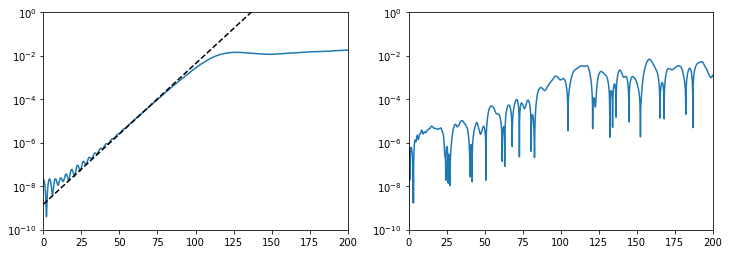

In [33]:
fig = plt.figure()
fig.set_figwidth(12)


plt.subplot(1, 2, 1)
plt.semilogy(tn, en_B)
plt.ylim((1e-10, 1e0))
plt.xlim((0., 200.))
plt.semilogy(tn, 1.5e-9*np.exp(2*tn*wi), 'k--')

plt.subplot(1, 2, 2)
plt.semilogy(tn, np.abs(en_tot[0] - en_tot)/en_tot[0])
plt.ylim((1e-10, 1e0))
plt.xlim((0., 200.))

## 2. 3 z - direction (with control variate)

(0.0, 200.0)

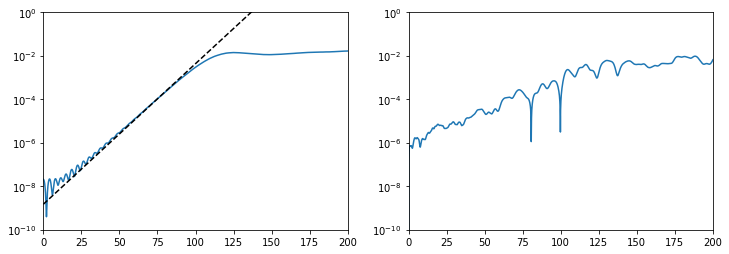

In [38]:
fig = plt.figure()
fig.set_figwidth(12)


plt.subplot(1, 2, 1)
plt.semilogy(tn, en_B)
plt.ylim((1e-10, 1e0))
plt.xlim((0., 200.))
plt.semilogy(tn, 1.5e-9*np.exp(2*tn*wi), 'k--')

plt.subplot(1, 2, 2)
plt.semilogy(tn, np.abs(en_tot[0] - en_tot)/en_tot[0])
plt.ylim((1e-10, 1e0))
plt.xlim((0., 200.))

## 2. 4 xy - direction (with control variate)

(0.0, 200.0)

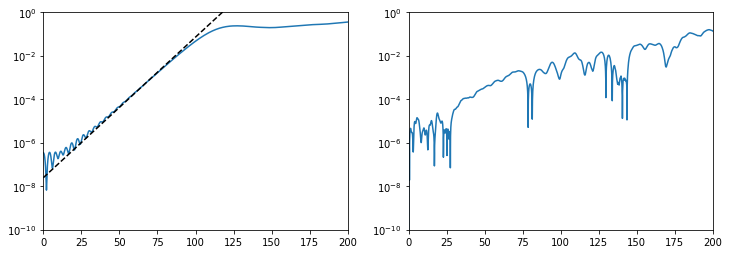

In [8]:
fig = plt.figure()
fig.set_figwidth(12)


plt.subplot(1, 2, 1)
plt.semilogy(tn, en_B)
plt.ylim((1e-10, 1e0))
plt.xlim((0., 200.))
plt.semilogy(tn, 2.5e-8*np.exp(2*tn*wi), 'k--')

plt.subplot(1, 2, 2)
plt.semilogy(tn, np.abs(en_tot[0] - en_tot)/en_tot[0])
plt.ylim((1e-10, 1e0))
plt.xlim((0., 200.))

## 2. 5 z - direction (without control variate)

(1e-16, 1.0)

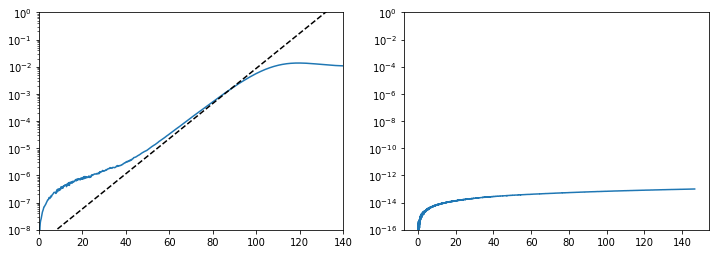

In [26]:
fig = plt.figure()
fig.set_figwidth(12)


plt.subplot(1, 2, 1)
plt.semilogy(tn, en_B)
plt.ylim((1e-8, 1e0))
plt.xlim((0., 140.))
plt.semilogy(tn, 3e-9*np.exp(2*tn*wi), 'k--')

plt.subplot(1, 2, 2)
plt.semilogy(tn, np.abs(en_tot[0] - en_tot)/en_tot[0])
plt.ylim((1e-16, 1e0))